In [1]:
import parse as p
import author_network as an
import text_mining as tm
import regression as re

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import networkx as nx
from community import community_louvain
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

Using TensorFlow backend.


In [2]:
#files = ['../data/icml2019.json']
#files = ['../data/icml2019.json','../data/icml2018.json','../data/icml2017.json']

files = ['../data/icml2019.json','../data/icml2018.json','../data/icml2017.json'
        , '../data/nips2019.json', '../data/nips2018.json', '../data/nips2017.json']

years = '(2017-2019, ICML&NIPS)'
#years = '(2019, ICML)'
re_years = [2017, 2018, 2019]
#re_years = [2019]
target = 2020
#figsize = (150,150)
figsize = (80,80)
figsize_i = (1000,1000)

author_list, paper_list = p.parse_json(files)
text = tm.get_title_abstracts(paper_list)

Read 6 files, 4943 papers and 10186 authors


# 1. tf-idf
### Learn and make tf-idf matrix

In [3]:
nltk.download("stopwords")
X = tm.get_title_abstracts(paper_list)
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(X) # learn words
sorted(tfidf.vocabulary_.items()) # sort word libary
tfidf_matrix = tfidf.fit_transform(X)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tfidf_dict = tfidf.get_feature_names()

In [5]:
data_array = tfidf_matrix.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(4943, 16982)

### tf-idf matrix

In [6]:
data # too big...

000   01  015   02   04   05   06   07   08  08x  ...  łojasiewicz   σ2  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...          ...  ...   
4938  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
4939  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
4940  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
4941  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   
4942  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0   

      φsds  ﬁnal  ﬁnd  ﬁnite  ﬁrst   ﬁt  ﬁtted  ﬂat  
0      0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
1      0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
2      0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
3      0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
4      0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
...    ...   ...  ...    ...   ...  ...    ...  ...  
4938   0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
4939   0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
4940   0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
4941   0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
4942   0.0   0.0  0.0    0.0   0.0  0.0    0.0  0.0  

[4943 rows x 16982 columns]

### Top 5 scoring words for each paper

In [7]:
df = pd.DataFrame(data.columns.values[np.argsort(-data.values, axis=1)[:, :5]], 
                  index=data.index,
                  columns = ['1st Max','2nd Max','3rd Max', '4th Max', '5th Max']).reset_index()
df.to_csv(r'../image/tfidf_top5.csv')

In [8]:
df

index         1st Max         2nd Max         3rd Max     4th Max  \
0         0  discretization         schemes            mars        ares   
1         1             der        relative           multi     dynamic   
2         2          mixhop    neighborhood          mixing       graph   
3         3            coin    distribution      randomness     testing   
4         4   communication     distributed       dimension     speedup   
...     ...             ...             ...             ...         ...   
4938   4938          maxing     comparisons         ranking   performed   
4939   4939  correspondence         cluster         network        node   
4940   4940        feedback            user     interactive     general   
4941   4941      likelihood  identification       dynamical  estimation   
4942   4942        residual           chaos  subexponential    backward   

            5th Max  
0           guesses  
1        importance  
2     relationships  
3          simulate  
4         sublinear  
...             ...  
4938    assumptions  
4939     clustering  
4940          learn  
4941        maximum  
4942       networks  

[4943 rows x 6 columns]

In [10]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

In [11]:
def top_cos_sim(vec, num, M):
    vec1 = np.array(vec)
    vec1 = vec1/np.sqrt(np.sum(np.square(np.array(vec1)), axis=1))[:,None]
    sim_matrix = np.matmul(vec1, vec1.T)
    sim_matrix -= np.eye(len(vec1))
    sim_shape = sim_matrix.shape
    
    sim_vec = sorted([ [i,j,sim_matrix[i][j]] for i in range(sim_shape[0]) for j in range(i,sim_shape[1])],
            key=lambda x: x[2], reverse=True)[:num]
    mean =  np.mean([v[2] for v in sim_vec])
    print("mean is: "+ str(mean))
    
    for i in range(len(sim_vec)):
        sim_vec[i][2] = sigmoid((sim_vec[i][2]-mean)*M)
        
    return sim_vec

In [12]:
sim_list = top_cos_sim(data.to_numpy(), 5800, 10)

mean is: 0.33700238917603376


In [14]:
G = tm.make_paper_graph(paper_list, sim_list)

In [15]:
import networkx as nx
from community import community_louvain

In [16]:
plt.figure(figsize = figsize)
sp = nx.spring_layout(G)
'''
nx.draw_networkx(G,
                pos=sp, 
                with_labels=False,
                node_size = 500,
                alpha=0.7,
                cmap = plt.cm.Set3
                )
# plt.axes('off')
plt.title('Total Paper Network')
plt.show()
'''

"\nnx.draw_networkx(G,\n                pos=sp, \n                with_labels=False,\n                node_size = 500,\n                alpha=0.7,\n                cmap = plt.cm.Set3\n                )\n# plt.axes('off')\nplt.title('Total Paper Network')\nplt.show()\n"

<Figure size 5760x5760 with 0 Axes>

In [17]:
partition_lou = community_louvain.best_partition(G, weight='weight',random_state=2020, resolution=100000)
values_lou = [partition_lou.get(node) for node in G.nodes()]

In [18]:
'''
plt.figure(figsize = figsize)
nx.draw_networkx(G,
                 pos=sp, 
                 with_labels=False, 
                 node_size = 500,
                 node_color=values_lou, 
                 alpha=0.7,
                 cmap = plt.cm.Set3
                )
plt.show()
'''

'\nplt.figure(figsize = figsize)\nnx.draw_networkx(G,\n                 pos=sp, \n                 with_labels=False, \n                 node_size = 500,\n                 node_color=values_lou, \n                 alpha=0.7,\n                 cmap = plt.cm.Set3\n                )\nplt.show()\n'

In [20]:
figsize_i = (1500,1500)
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
fig = tm.make_iplot_fig(G, sp, values_lou, 'Viridis', 15, None, figsize_i)
init_notebook_mode(connected=True)
iplot(fig)

In [25]:
tm.save_topN_paper_csv('../image/paper_topN_group_list(tf-idf, louvain)'+years+'.csv', G, paper_list, values_lou, 50)

[(0, 227), (23, 157), (24, 139), (4, 116), (43, 115), (72, 100), (55, 87), (41, 83), (38, 78), (14, 76), (17, 65), (20, 60), (35, 55), (34, 53), (10, 49), (15, 45), (44, 43), (53, 43), (5, 42), (7, 40), (85, 38), (36, 37), (19, 33), (47, 30), (42, 27), (1, 26), (52, 25), (33, 23), (51, 23), (60, 23), (69, 23), (113, 23), (22, 22), (61, 22), (74, 21), (124, 21), (28, 20), (82, 20), (62, 19), (21, 17), (30, 17), (98, 13), (102, 13), (6, 12), (50, 12), (107, 11), (111, 11), (27, 10), (29, 10), (64, 10)]


In [26]:
flag = True
DRAW = False
if (flag):
    values_nv = tm.node2vec_kmeans(G, 50)
    if (DRAW):
        plt.figure(figsize = figsize)
        nx.draw_networkx(G,
                         pos=sp, 
                         with_labels=False, 
                         node_size = 500,
                         node_color=values_nv, 
                         alpha=0.7,
                         cmap = plt.cm.Set3
                        )
        plt.show()

Generating walks (CPU: 1): 100%|██████████| 2000/2000 [40:41<00:00,  1.22s/it]


00, ['Fairness Behind a Veil of Ignorance: A Welfare Analysis for Automated Decision Making', 'On the Long-term Impact of Algorithmic Decision Policies: Effort Unfairness and Feature Segregation through Social Learning', 'From Parity to Preference-based Notions of Fairness in Classification', 'Beyond Parity: Fairness Objectives for Collaborative Filtering', 'Delayed Impact of Fair Machine Learning', 'Avoiding Discrimination through Causal Reasoning', 'Delayed Impact of Fair Machine Learning', 'Residual Unfairness in Fair Machine Learning from Prejudiced Data', 'Preventing Fairness Gerrymandering: Auditing and Learning for Subgroup Fairness', 'Fair Regression: Quantitative Definitions and Reduction-Based Algorithms']
01, ['Interval timing in deep reinforcement learning agents', 'Visualizing and Understanding Atari Agents', 'On the Utility of Learning about Humans for Human-AI Coordination', 'Visualizing and Understanding Atari Agents', 'Interval timing in deep reinforcement learning age

In [86]:
if (flag):
    fig = tm.make_iplot_fig(G, sp, values_nv, 'Viridis', 20, '#ffffff', figsize_i)
    init_notebook_mode(connected=True)
    iplot(fig)

In [28]:
tm.save_topN_paper_csv('../image/paper_topN_group_list(tf-idf, node2vec)'+years+'.csv', G, paper_list, values_nv, 50)

[(10, 152), (8, 127), (32, 102), (31, 96), (37, 94), (6, 93), (3, 92), (9, 90), (27, 80), (16, 80), (35, 80), (2, 76), (19, 75), (5, 73), (14, 73), (42, 71), (38, 71), (20, 71), (28, 69), (45, 66), (7, 65), (26, 63), (11, 63), (48, 61), (1, 61), (40, 61), (41, 60), (43, 60), (46, 54), (13, 53), (18, 52), (22, 52), (23, 47), (30, 47), (39, 46), (49, 44), (36, 43), (24, 41), (17, 39), (44, 38), (0, 37), (21, 36), (34, 35), (29, 33), (4, 32), (12, 29), (33, 29), (15, 25), (47, 23), (25, 14)]


In [60]:
def get_paper_vector(G, re_groups, re_papers, years):
    years.sort()
    group_vec = []
    b_year = int(years[0])
    ctr = collections.Counter(values_lou)

    for i in range(len(ctr)):
        group_vec.append([0 for year in years])
        group = re_groups[i]
        
        j = 0
        for node in G:
            if (i == re_groups[j]):
                paper_index = p.find_paper(node, re_papers)
                paper = re_papers[paper_index]
                index = int(paper.year) - b_year
                group_vec[i][index] += 1 #/year_paper[index][1]
            j += 1

    return group_vec

def get_paper_regression(G, re_groups, re_papers, years, target):
    group_vec = get_paper_vector(G, re_groups, re_papers, years)
    total_vec = group_vec
    
    for t in target:
        predictions = []
        for vec in group_vec:
            line = LinearRegression()
            line.fit(np.array(years).reshape(-1,1)
                    , np.array(vec))
            predict = line.predict([[t]])
            predictions.append(predict[0])
        temp = total_vec
        total_vec =  [temp[i]+[predictions[i]]
                    for i in range(len(group_vec))]
        
    ctr = collections.Counter(values_lou)
    group_id = [i for i in range(len(ctr))]
    print(len(total_vec))
    print(len(group_id))

    return [[x for _,x in sorted(zip(total_vec, group_id)
        , key=lambda y: y[0][len(years)], reverse=True)],
        sorted(total_vec, key=lambda x: x[len(years)], reverse=True)]

In [61]:
target = [2020, 2021]
from sklearn.linear_model import LinearRegression
sort_group_name_lou, sort_group_predict_lou = get_paper_regression(G, values_lou, paper_list, re_years, target)

297
297


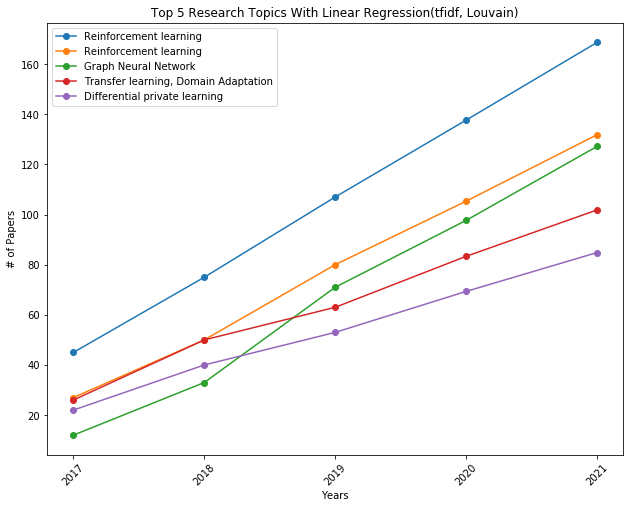

In [85]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
total_years = re_years + target
ax.set_xticks(total_years)
for i in range(5):
    plt.plot(total_years, sort_group_predict_lou[i], "o-",
             label=group_name(sort_group_name_lou[i])
            )
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('# of Papers')
plt.title('Top 5 Research Topics With Linear Regression(tfidf, Louvain)')
plt.savefig('../image/tfidf/regression_paper_tfidf_louvain.pdf', 
            bbox_inches='tight')
plt.show()

In [71]:
def get_paper_vector_ratio(G, re_groups, re_papers, years):
    years.sort()
    group_vec = []
    year_paper = []
    b_year = int(years[0])
    ctr = collections.Counter(values_lou)
    
    for year in years:
        year_paper.append([year, 0])

    for paper in re_papers:
        index = int(paper.year) - b_year
        year_paper[index][1] += 1

    print(year_paper)

    for i in range(len(ctr)):
        group_vec.append([0 for year in years])
        group = re_groups[i]
        
        j = 0
        for node in G:
            if (i == re_groups[j]):
                paper_index = p.find_paper(node, re_papers)
                paper = re_papers[paper_index]
                index = int(paper.year) - b_year
                group_vec[i][index] += 1 /year_paper[index][1]
            j += 1

    return group_vec

def get_paper_regression_ratio(G, re_groups, re_papers, years, target):
    group_vec = get_paper_vector_ratio(G, re_groups, re_papers, years)
    total_vec = group_vec
    
    for t in target:
        predictions = []
        for vec in group_vec:
            line = LinearRegression()
            line.fit(np.array(years).reshape(-1,1)
                    , np.array(vec))
            predict = line.predict([[t]])
            predictions.append(predict[0])
        temp = total_vec
        total_vec =  [temp[i]+[predictions[i]]
                    for i in range(len(group_vec))]
        
    ctr = collections.Counter(values_lou)
    group_id = [i for i in range(len(ctr))]
    print(len(total_vec))
    print(len(group_id))

    return [[x for _,x in sorted(zip(total_vec, group_id)
        , key=lambda y: y[0][len(years)], reverse=True)],
        sorted(total_vec, key=lambda x: x[len(years)], reverse=True)]

In [72]:
sort_group_name_lou_r, sort_group_predict_lou_r = get_paper_regression_ratio(G, values_lou, paper_list, re_years, target)

[[2017, 1113], [2018, 1630], [2019, 2200]]
297
297


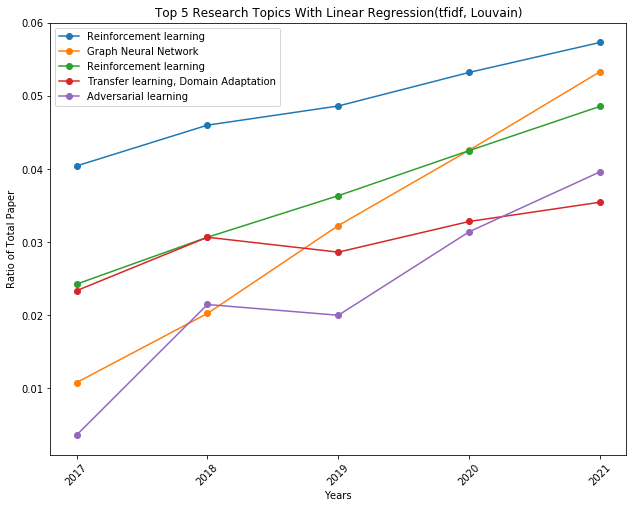

In [84]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
total_years = re_years + target
ax.set_xticks(total_years)
for i in range(5):
    plt.plot(total_years, sort_group_predict_lou_r[i], "o-",
             label=group_name(sort_group_name_lou_r[i])
            )
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Ratio of Total Paper')
plt.title('Top 5 Research Topics With Linear Regression(tfidf, Louvain)')
plt.savefig('../image/tfidf/regression_paper_ratio_tfidf_louvain.pdf', 
            bbox_inches='tight')
plt.show()

In [83]:
def group_name(group_id):
    name = {}
    name[0] = 'Reinforcement learning'
    name[23] = 'Reinforcement learning'
    name[24] = 'Transfer learning, Domain Adaptation'
    name[4] = 'Graph Neural Network'
    name[43] = 'Differential private learning'
    name[72] = 'Variational Methods'
    name[55] = 'Matrix decomposition (low-rank matrix)'
    name[41] = 'Adversarial learning'
    name[38] = 'Submodular'
    name[17] = 'Deep models for 3D/2D image/video/object detection'
    name[35] = 'Clustering'
    name[34] = 'Meta-learning'
    
    if int(group_id) in name.keys():
        return name[int(group_id)]
    else:
        return str(group_id)